### We worked on Google Colab while doing the project.
### When we open the .ipynb file as Jupyter Notebook, some plots look smaller than they are there.
### In order to see the plots more easily, you can click on them twice and zoom in.

## Introduction
In today’s world, stock prices are one of the most crucial parts of a company's finances. The movement of stock prices is influenced by various factors, both internal and external. In this project, some companies will be selected and their stock prices will be analyzed in a span of two years. The analysis encapsulates the changes in stock prices, the reasons of changes and  the observation of outliers. The methods used are time series analysis, box plot, 3-Sigma technique. Time series analysis is used for visualizing data and observing the changes in stock prices. Box plot and 3-Sigma technique are used for identifying outliers.

## Importing necessary libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gzip
import shutil

input_file = 'all_ticks_wide.csv.gz'
output_file = 'data.csv'  # Specify the desired name for the output CSV file

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
df = pd.read_csv("data.csv")

df.head()

timestamp    AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
0  2012-09-17T06:45:00Z  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
1  2012-09-17T07:00:00Z  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2  2012-09-17T07:15:00Z  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
3  2012-09-17T07:30:00Z  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
4  2012-09-17T07:45:00Z  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   

    ANACM   ARCLK   ASELS  ...   TTKOM  TUKAS    TUPRS    USAK   VAKBN  VESTL  \
0  1.0634  6.9909  2.9948  ...  4.2639   0.96  29.8072  1.0382  3.8620   1.90   
1  1.0634  6.9259  2.9948  ...  4.2521   0.96  29.7393  1.0382  3.8529   1.90   
2  1.0679  6.9909  2.9855  ...  4.2521   0.97  29.6716  1.0463  3.8436   1.91   
3  1.0679  6.9584  2.9855  ...  4.2521   0.97  29.7393  1.0382  3.8529   1.91   
4  1.0725  6.9909  2.9760  ...  4.2521   0.97  29.8072  1.0382  3.8620   1.90   

    YATAS   YKBNK   YUNSA   ZOREN  
0  0.4172  2.5438  2.2619  0.7789  
1  0.4229  2.5266  2.2462  0.7789  
2  0.4229  2.5266  2.2566  0.7789  
3  0.4286  2.5324  2.2619  0.7860  
4  0.4286  2.5324  2.2619  0.7789  

[5 rows x 61 columns]

## Preprocessing of data

In [ ]:
# Setting index to timestamp to have a proper format for time series data
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

In [ ]:
# Choosing the columns to analyze
df = df[["GARAN", "YKBNK", "THYAO", "PETKM", "TCELL", "TTKOM"]]

In [ ]:
# Define the date range for analysis
start_date = '2015-01-01'
end_date = '2017-01-01'

# Slice the DataFrame based on the date range
ts = df.loc[start_date:end_date]


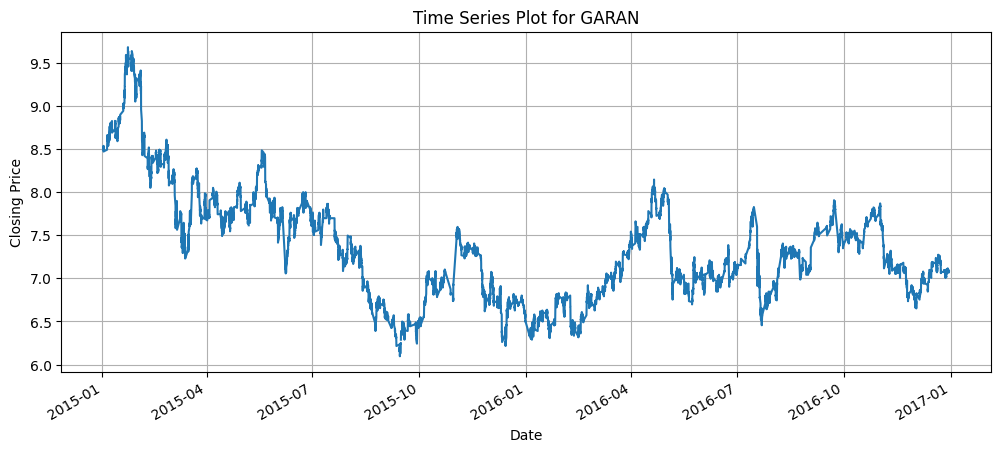

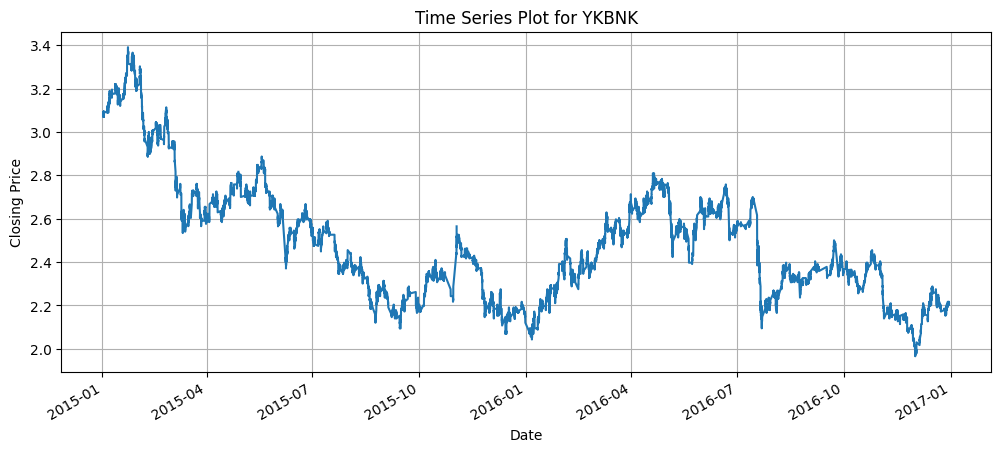

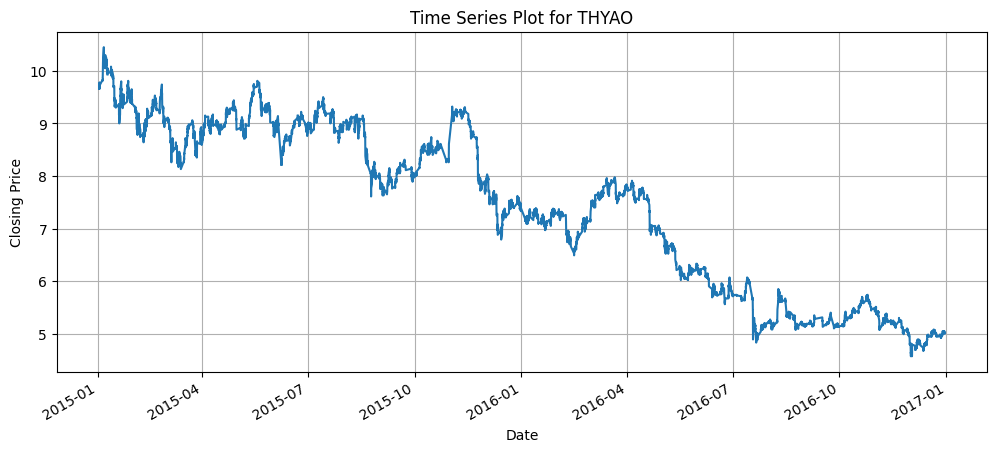

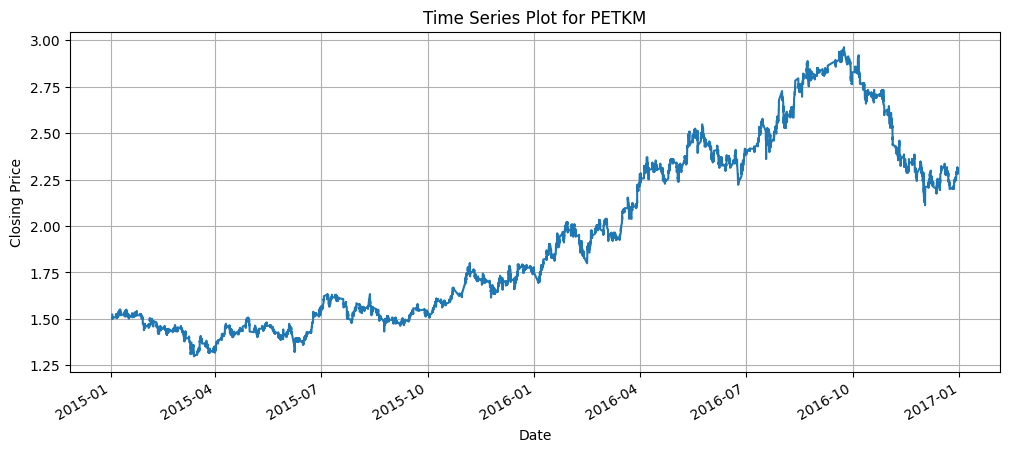

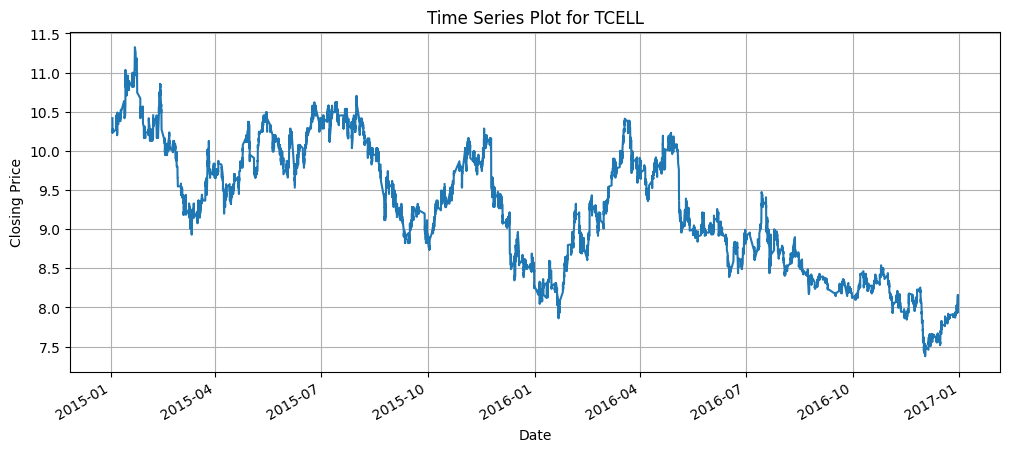

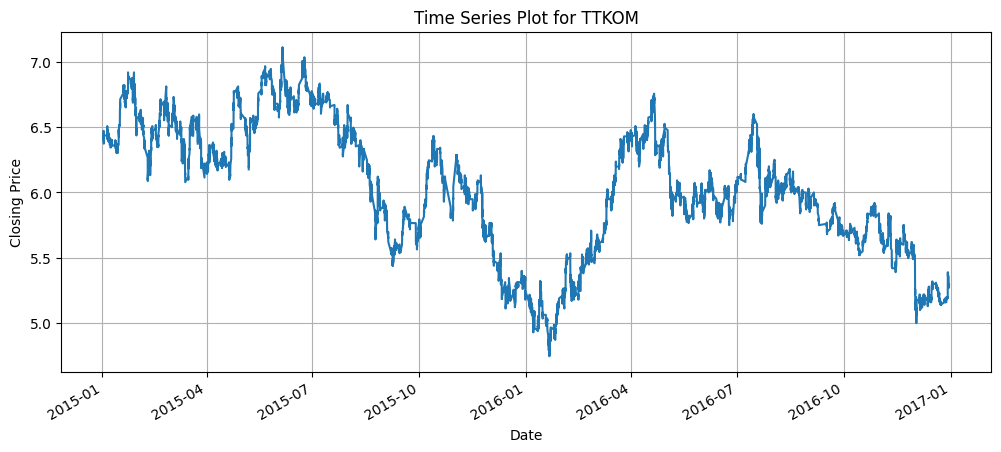

In [ ]:
# Plotting individual time series for each stock
for column in ts.columns:
    ts[column].plot(figsize=(12, 5))
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()


In [ ]:
print(f"Number of NaN values for each column: \n{ts.isna().sum()}")
proportion = ts.isna().sum().sort_values(ascending=False)[0] / ts.shape[0]
print(f"Proportion of the NaN values in the whole data in the column which has max NaN values: {proportion}")

# Since the proportion is small enough, dropping the NaN values will not cause a major problem.


Number of NaN values for each column: 
GARAN    196
YKBNK    216
THYAO    195
PETKM    237
TCELL    233
TTKOM    227
dtype: int64
Proportion of the NaN values in the whole data in the column which has max NaN values: 0.016285301999587713


In [ ]:
# Drop the NaN values
ts = ts.dropna()

## Boxplots

This code was developed by ChatGPT after much trials. It cannot be shared here because there is no specific prompt.

<ipython-input-10-7649127b27b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Year'] = ts.index.year
<ipython-input-10-7649127b27b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Month'] = ts.index.month
<ipython-input-10-7649127b27b3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.sort_values(['Year', '

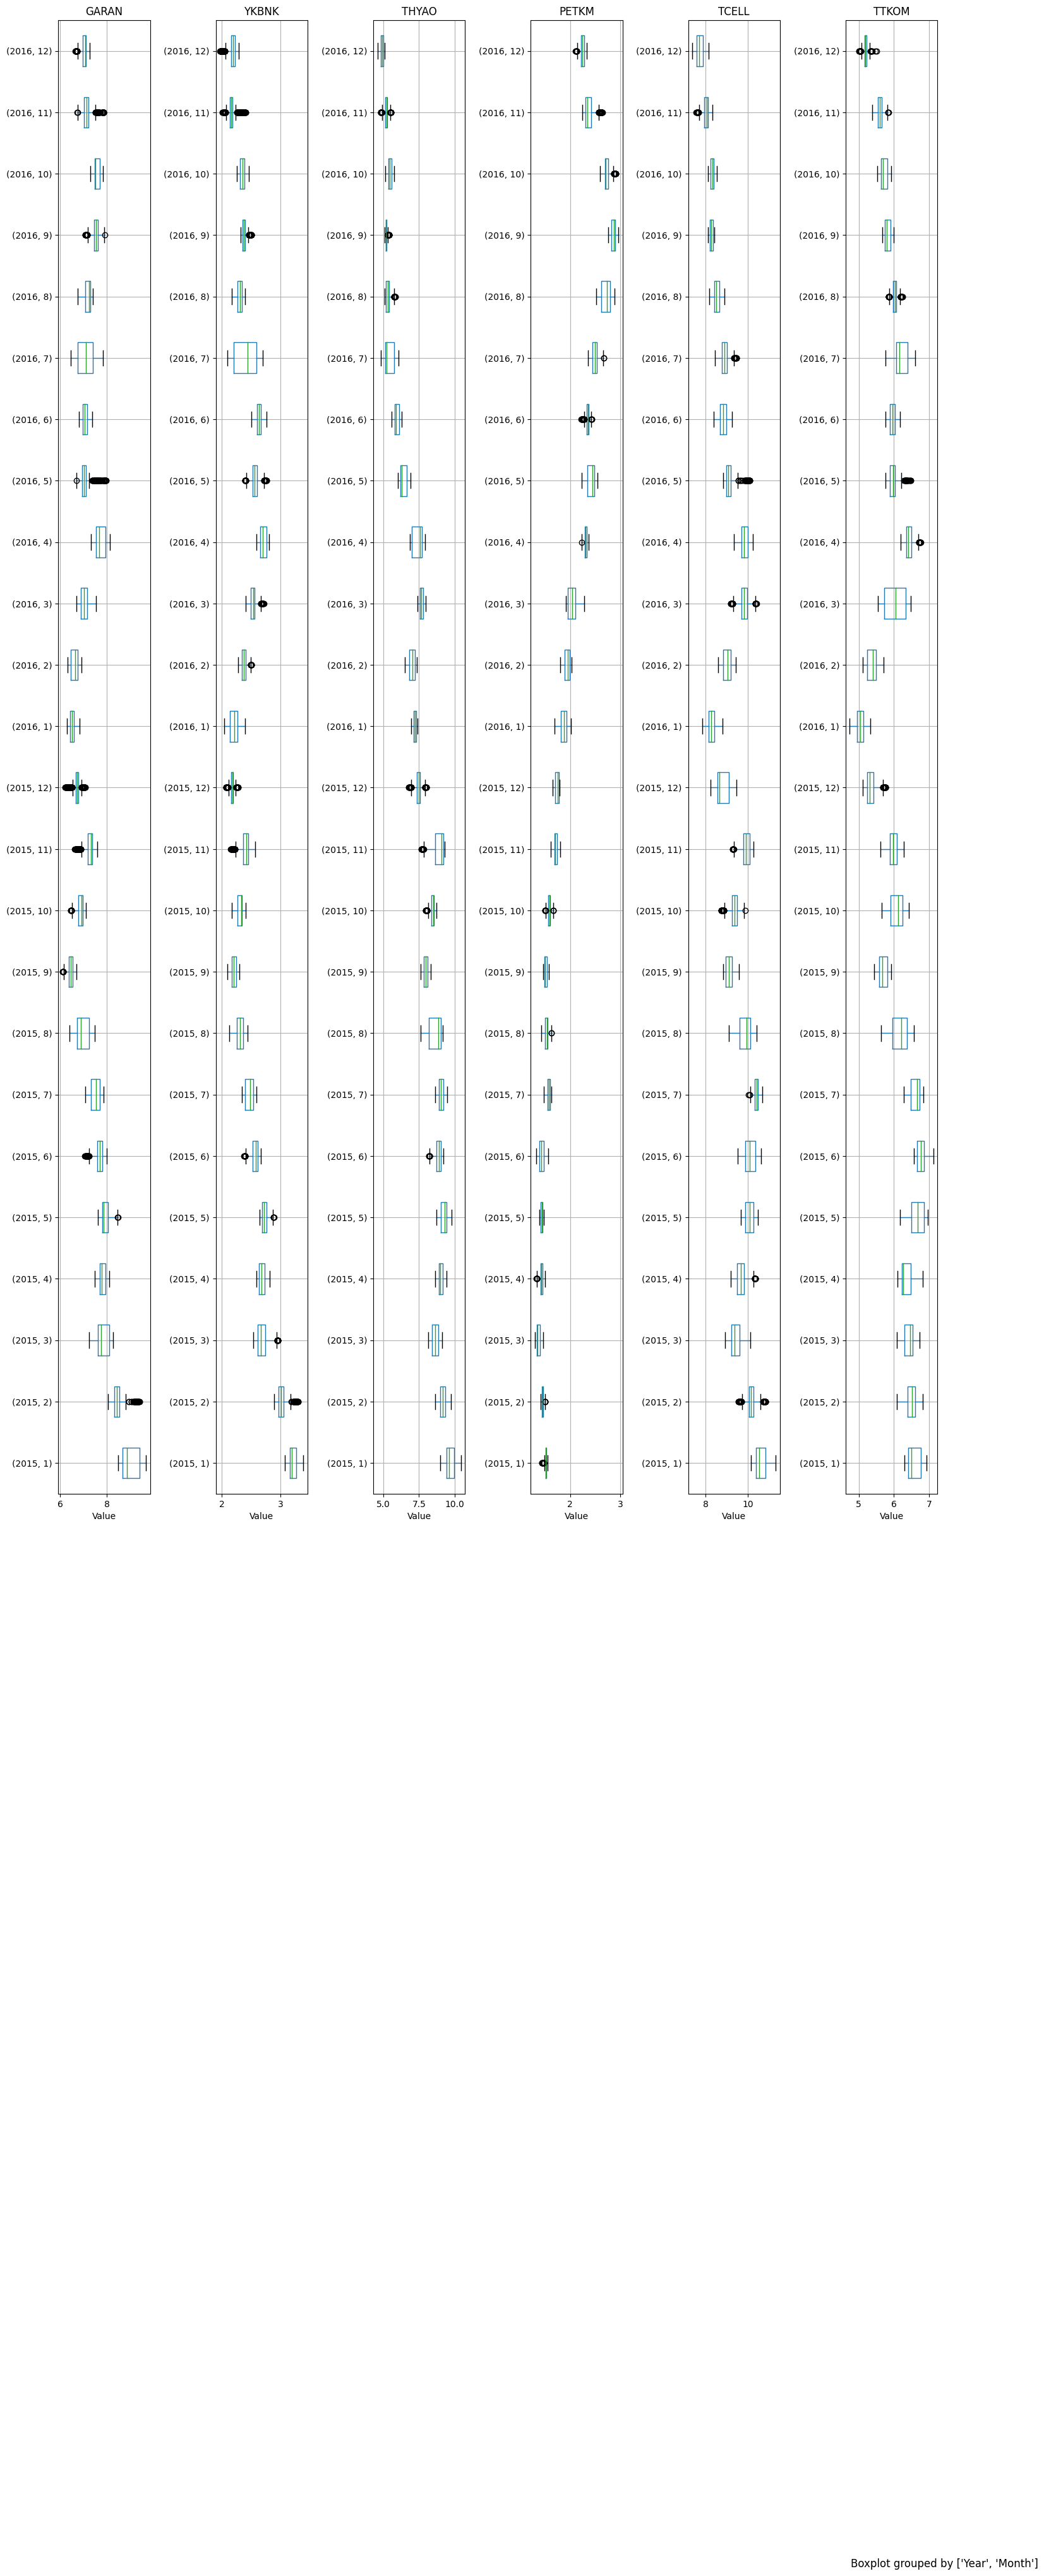

In [ ]:
# Ensure that the DataFrame has a datetime index
ts.index = pd.to_datetime(ts.index)

# Extract the year and month information for each timestamp
ts['Year'] = ts.index.year
ts['Month'] = ts.index.month

# Define the order of months for sorting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by Year and Month
ts.sort_values(['Year', 'Month'], inplace=True)

# Create a figure with 24 subplots (2 rows, 12 columns)
fig, axes = plt.subplots(nrows=2, ncols=12, figsize=(30, 10))
fig.suptitle('Monthly Boxplots for Each Company', fontsize=16)

# Loop through each company
for i, company in enumerate(ts.columns[:-2]):  # Exclude 'Year' and 'Month' columns
    row = i // 12  # Calculate the row index
    col = i % 12   # Calculate the column index

    # Group the data by Year and Month and plot boxplots for each month
    ts.boxplot(column=company, by=['Year', 'Month'], ax=axes[row, col], vert=False)

    # Set titles and labels
    axes[row, col].set_title(company)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('')

# Remove empty subplots if there are fewer than 12 months of data
for i in range(len(ts.columns[:-2]), 24):
    row = i // 12
    col = i % 12
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(top=5)
plt.show()

## 1.5 IQR Method

In [ ]:
# Defining 1.5 IQR method to detect the outliers
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_IQR = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_IQR


Number of outliers in 'GARAN': 324
                            GARAN   YKBNK  THYAO   PETKM    TCELL   TTKOM  \
timestamp                                                                   
2015-01-19 07:30:00+00:00  8.9397  3.1577   9.36  1.5230  10.8167  6.7574   
2015-01-19 07:45:00+00:00  9.0026  3.1640   9.37  1.5306  10.8894  6.8200   
2015-01-19 08:00:00+00:00  8.9666  3.1577   9.30  1.5230  10.8532  6.7842   
2015-01-19 08:15:00+00:00  8.9666  3.1702   9.27  1.5191  10.8894  6.8110   
2015-01-19 08:30:00+00:00  8.9666  3.1640   9.25  1.5230  10.9256  6.7932   
...                           ...     ...    ...     ...      ...     ...   
2015-02-03 14:30:00+00:00  9.1376  3.2207   9.05  1.5002  10.1997  6.5519   
2015-02-03 14:45:00+00:00  9.0477  3.1892   8.98  1.4963  10.1997  6.5876   
2015-02-03 15:00:00+00:00  9.0477  3.1577   8.92  1.4925  10.1271  6.5429   
2015-02-03 15:15:00+00:00  8.9577  3.1766   8.90  1.4963  10.1997  6.5429   
2015-02-03 15:30:00+00:00  8.9577  3.1829

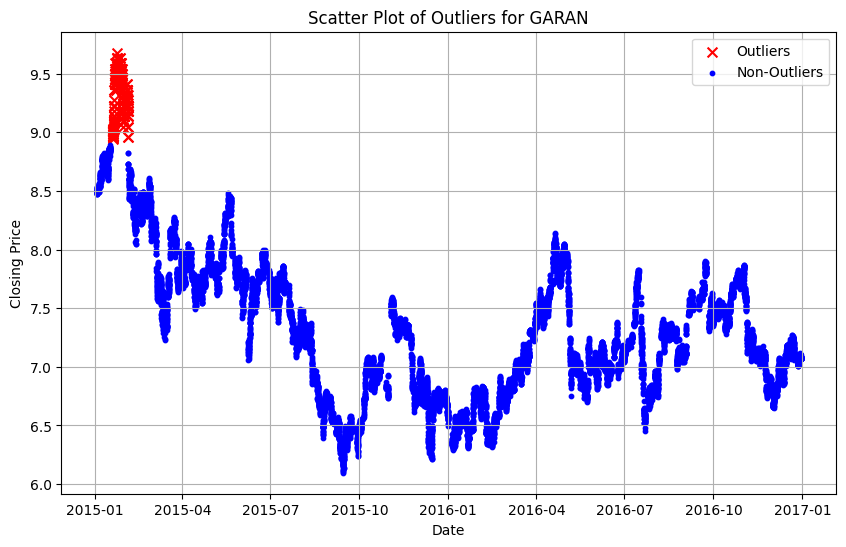

Number of outliers in 'YKBNK': 309
                            GARAN   YKBNK  THYAO   PETKM    TCELL   TTKOM  \
timestamp                                                                   
2015-01-12 08:30:00+00:00  8.7685  3.2018  10.00  1.5267  10.5627  6.3641   
2015-01-12 08:45:00+00:00  8.7956  3.2144  10.00  1.5345  10.5989  6.3641   
2015-01-12 09:00:00+00:00  8.7956  3.2081  10.00  1.5306  10.5627  6.3730   
2015-01-12 09:15:00+00:00  8.7956  3.2081  10.00  1.5345  10.5627  6.3730   
2015-01-12 09:30:00+00:00  8.7866  3.2081   9.99  1.5306  10.5627  6.3730   
...                           ...     ...    ...     ...      ...     ...   
2015-02-03 13:30:00+00:00  9.1376  3.2207   9.06  1.5002  10.2360  6.5697   
2015-02-03 13:45:00+00:00  9.1828  3.2270   9.06  1.5002  10.2360  6.5340   
2015-02-03 14:00:00+00:00  9.2277  3.2270   9.07  1.5040  10.2360  6.5519   
2015-02-03 14:15:00+00:00  9.2277  3.2270   9.07  1.5002  10.2360  6.5519   
2015-02-03 14:30:00+00:00  9.1376  3.2207

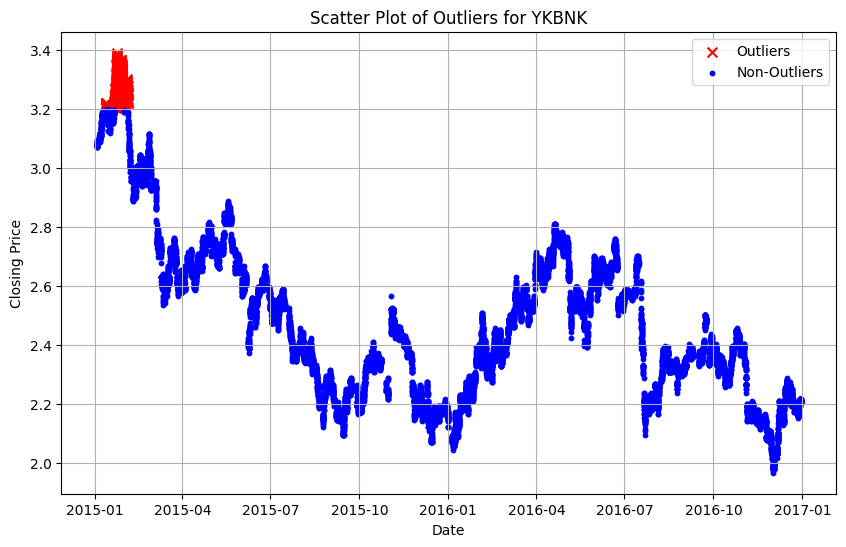

Number of outliers in 'THYAO': 0
Empty DataFrame
Columns: [GARAN, YKBNK, THYAO, PETKM, TCELL, TTKOM, Year, Month]
Index: []


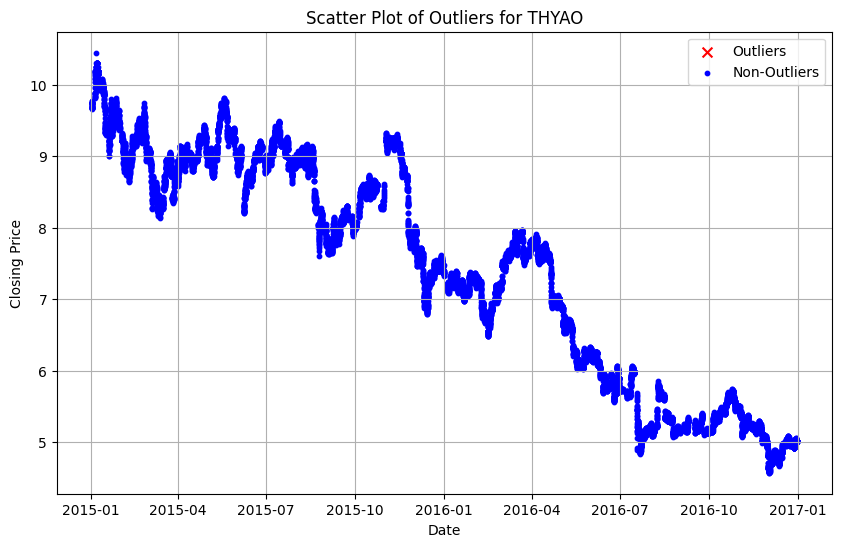

Number of outliers in 'PETKM': 0
Empty DataFrame
Columns: [GARAN, YKBNK, THYAO, PETKM, TCELL, TTKOM, Year, Month]
Index: []


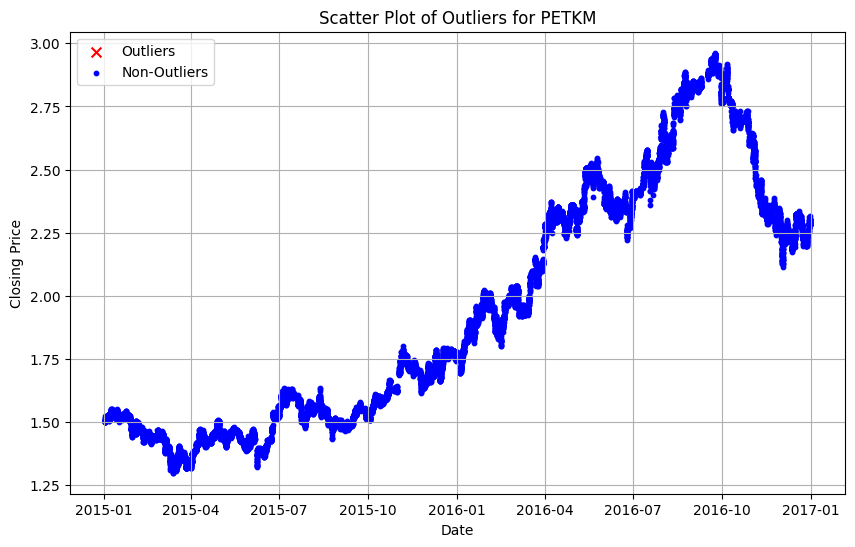

Number of outliers in 'TCELL': 0
Empty DataFrame
Columns: [GARAN, YKBNK, THYAO, PETKM, TCELL, TTKOM, Year, Month]
Index: []


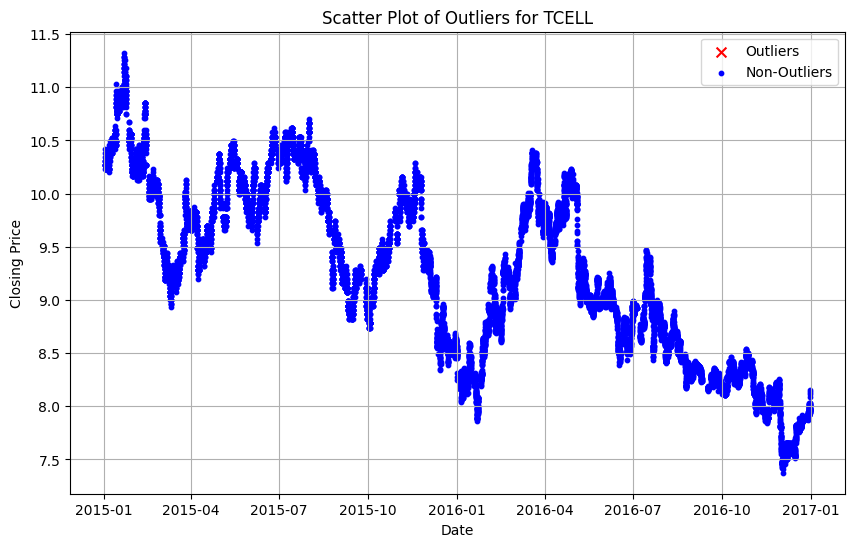

Number of outliers in 'TTKOM': 0
Empty DataFrame
Columns: [GARAN, YKBNK, THYAO, PETKM, TCELL, TTKOM, Year, Month]
Index: []


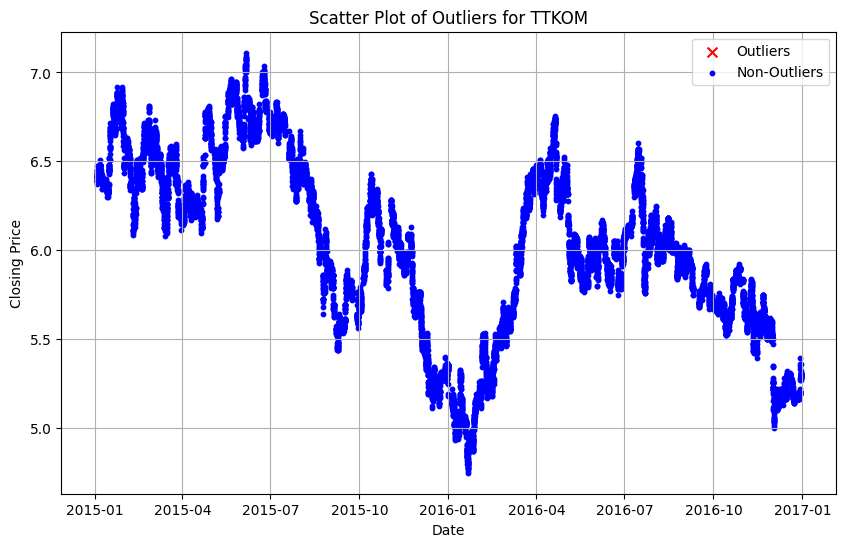

In [ ]:
# Finding and visualizing the outliers for each column
columns_to_check = ["GARAN", "YKBNK", "THYAO", "PETKM", "TCELL", "TTKOM"]

# Finding the outliers for each column
for column in columns_to_check:
    outliers = find_outliers_iqr(ts, column)
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")
    print(outliers)

    # Scatter plot the outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(outliers.index, outliers[column], c='red', label='Outliers', marker='x', s=50)

    # Plot the non-outlier data in blue
    non_outliers = ts.drop(outliers.index)
    plt.scatter(non_outliers.index, non_outliers[column], c='blue', label='Non-Outliers', marker='o', s=10)

    plt.title(f'Scatter Plot of Outliers for {column}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

## 3-sigma Method

In [ ]:
# Defining 3-sigma method for detecting outliers
def find_outliers_sigma(data, column):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = abs((data[column] - mean) / std)
    outliers_3sigma = data[z_scores > 3]
    return outliers_3sigma


Number of outliers in 'GARAN': 238
                            GARAN   YKBNK  THYAO   PETKM    TCELL   TTKOM  \
timestamp                                                                   
2015-01-20 13:30:00+00:00  9.2277  3.2081   9.53  1.5191  10.9256  6.7574   
2015-01-20 13:45:00+00:00  9.2277  3.2270   9.52  1.5116  10.8167  6.7395   
2015-01-20 14:00:00+00:00  9.2277  3.2207   9.52  1.5116  10.8532  6.7306   
2015-01-20 14:15:00+00:00  9.2277  3.2144   9.52  1.5152  10.8532  6.7127   
2015-01-20 14:30:00+00:00  9.2728  3.1955   9.52  1.5152  10.8532  6.6859   
...                           ...     ...    ...     ...      ...     ...   
2015-02-03 12:00:00+00:00  9.2277  3.2522   9.10  1.4925  10.2360  6.5608   
2015-02-03 12:15:00+00:00  9.2277  3.2522   9.08  1.5040  10.2723  6.5697   
2015-02-03 12:30:00+00:00  9.2728  3.2522   9.09  1.5040  10.2723  6.5340   
2015-02-03 14:00:00+00:00  9.2277  3.2270   9.07  1.5040  10.2360  6.5519   
2015-02-03 14:15:00+00:00  9.2277  3.2270

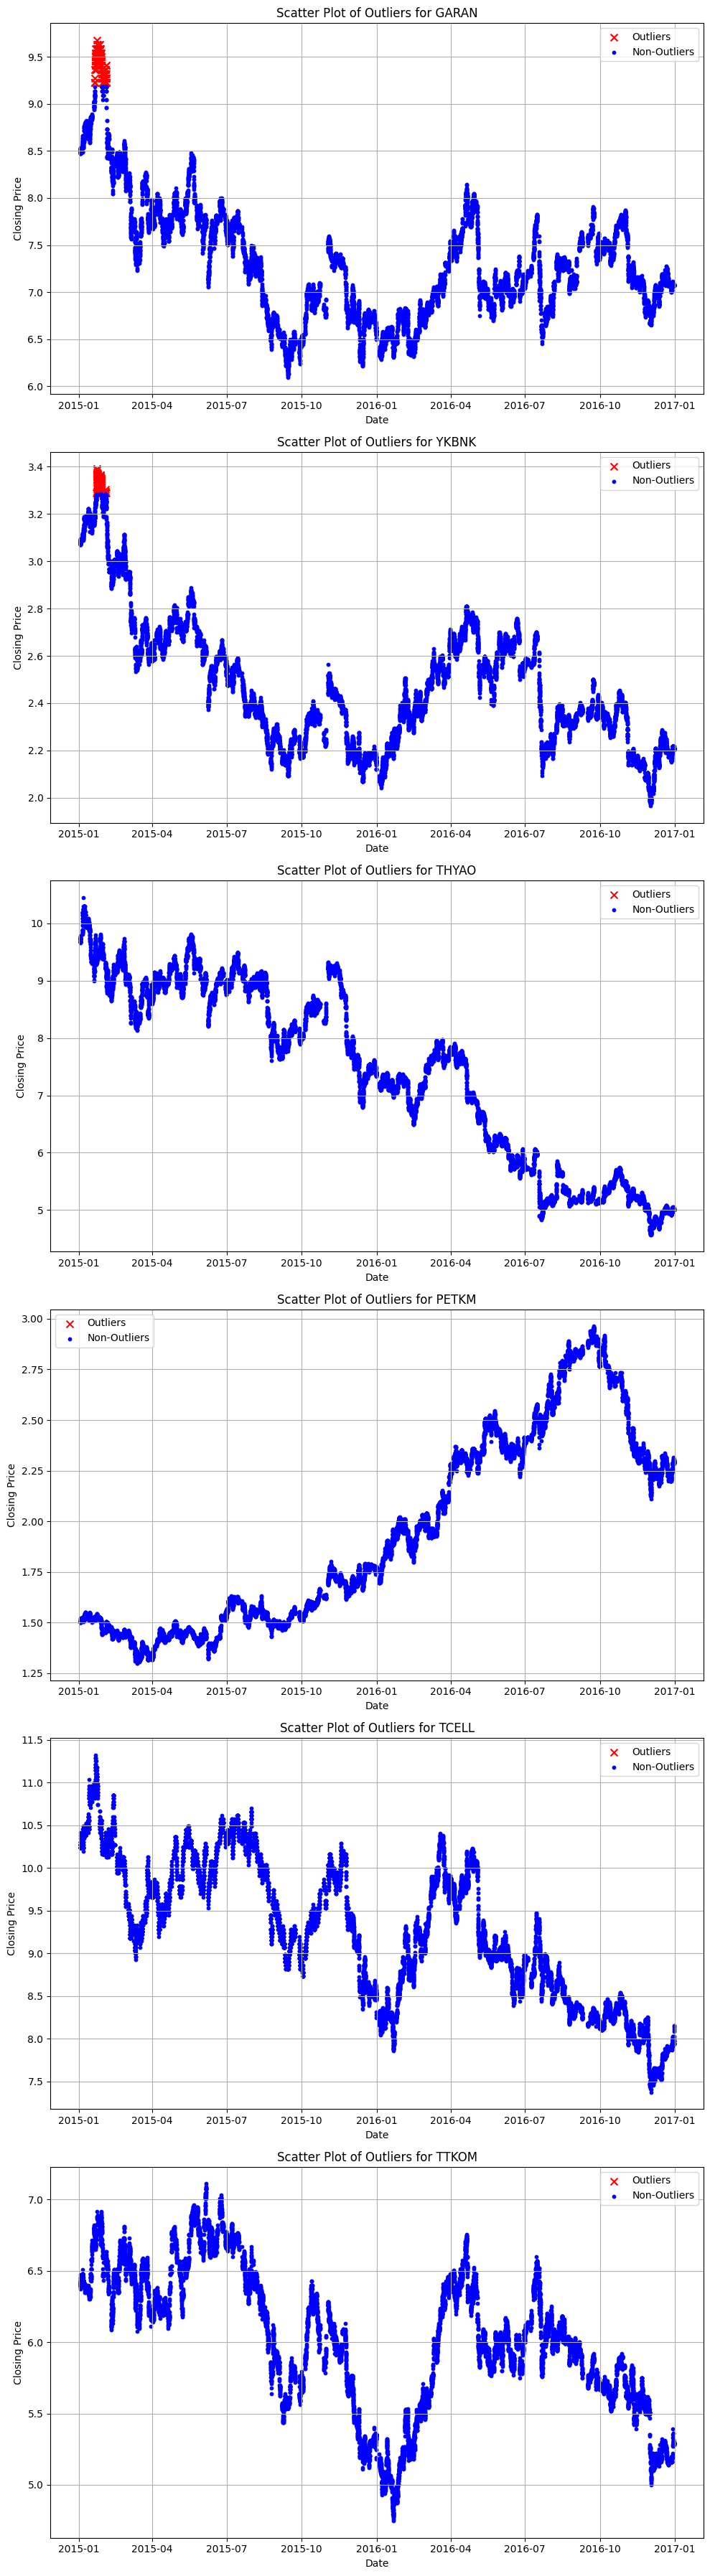

In [ ]:
# Finding and visualizing the outliers for each column
columns_to_check = ["GARAN", "YKBNK", "THYAO", "PETKM", "TCELL", "TTKOM"]

# Initialize a figure to hold subplots
fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=1, figsize=(10, 6 * len(columns_to_check)))

# Loop through each column and find outliers and create plots
for i, column in enumerate(columns_to_check):
    outliers = find_outliers_sigma(ts, column)
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")
    print(outliers)

    # Scatter plot the outliers
    ax = axes[i]
    ax.scatter(outliers.index, outliers[column], c='red', label='Outliers', marker='x', s=50)

    # Plot the non-outlier data in blue
    non_outliers = ts.drop(outliers.index)
    ax.scatter(non_outliers.index, non_outliers[column], c='blue', label='Non-Outliers', marker='o', s=10)

    ax.set_title(f'Scatter Plot of Outliers for {column}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Scatter plots after detecting outliers

The following code was developed by chatgpt, but the process of obtaining the code is very long and painful, so it cannot be added here as a single prompt. It took almost 15 tries to get this code.

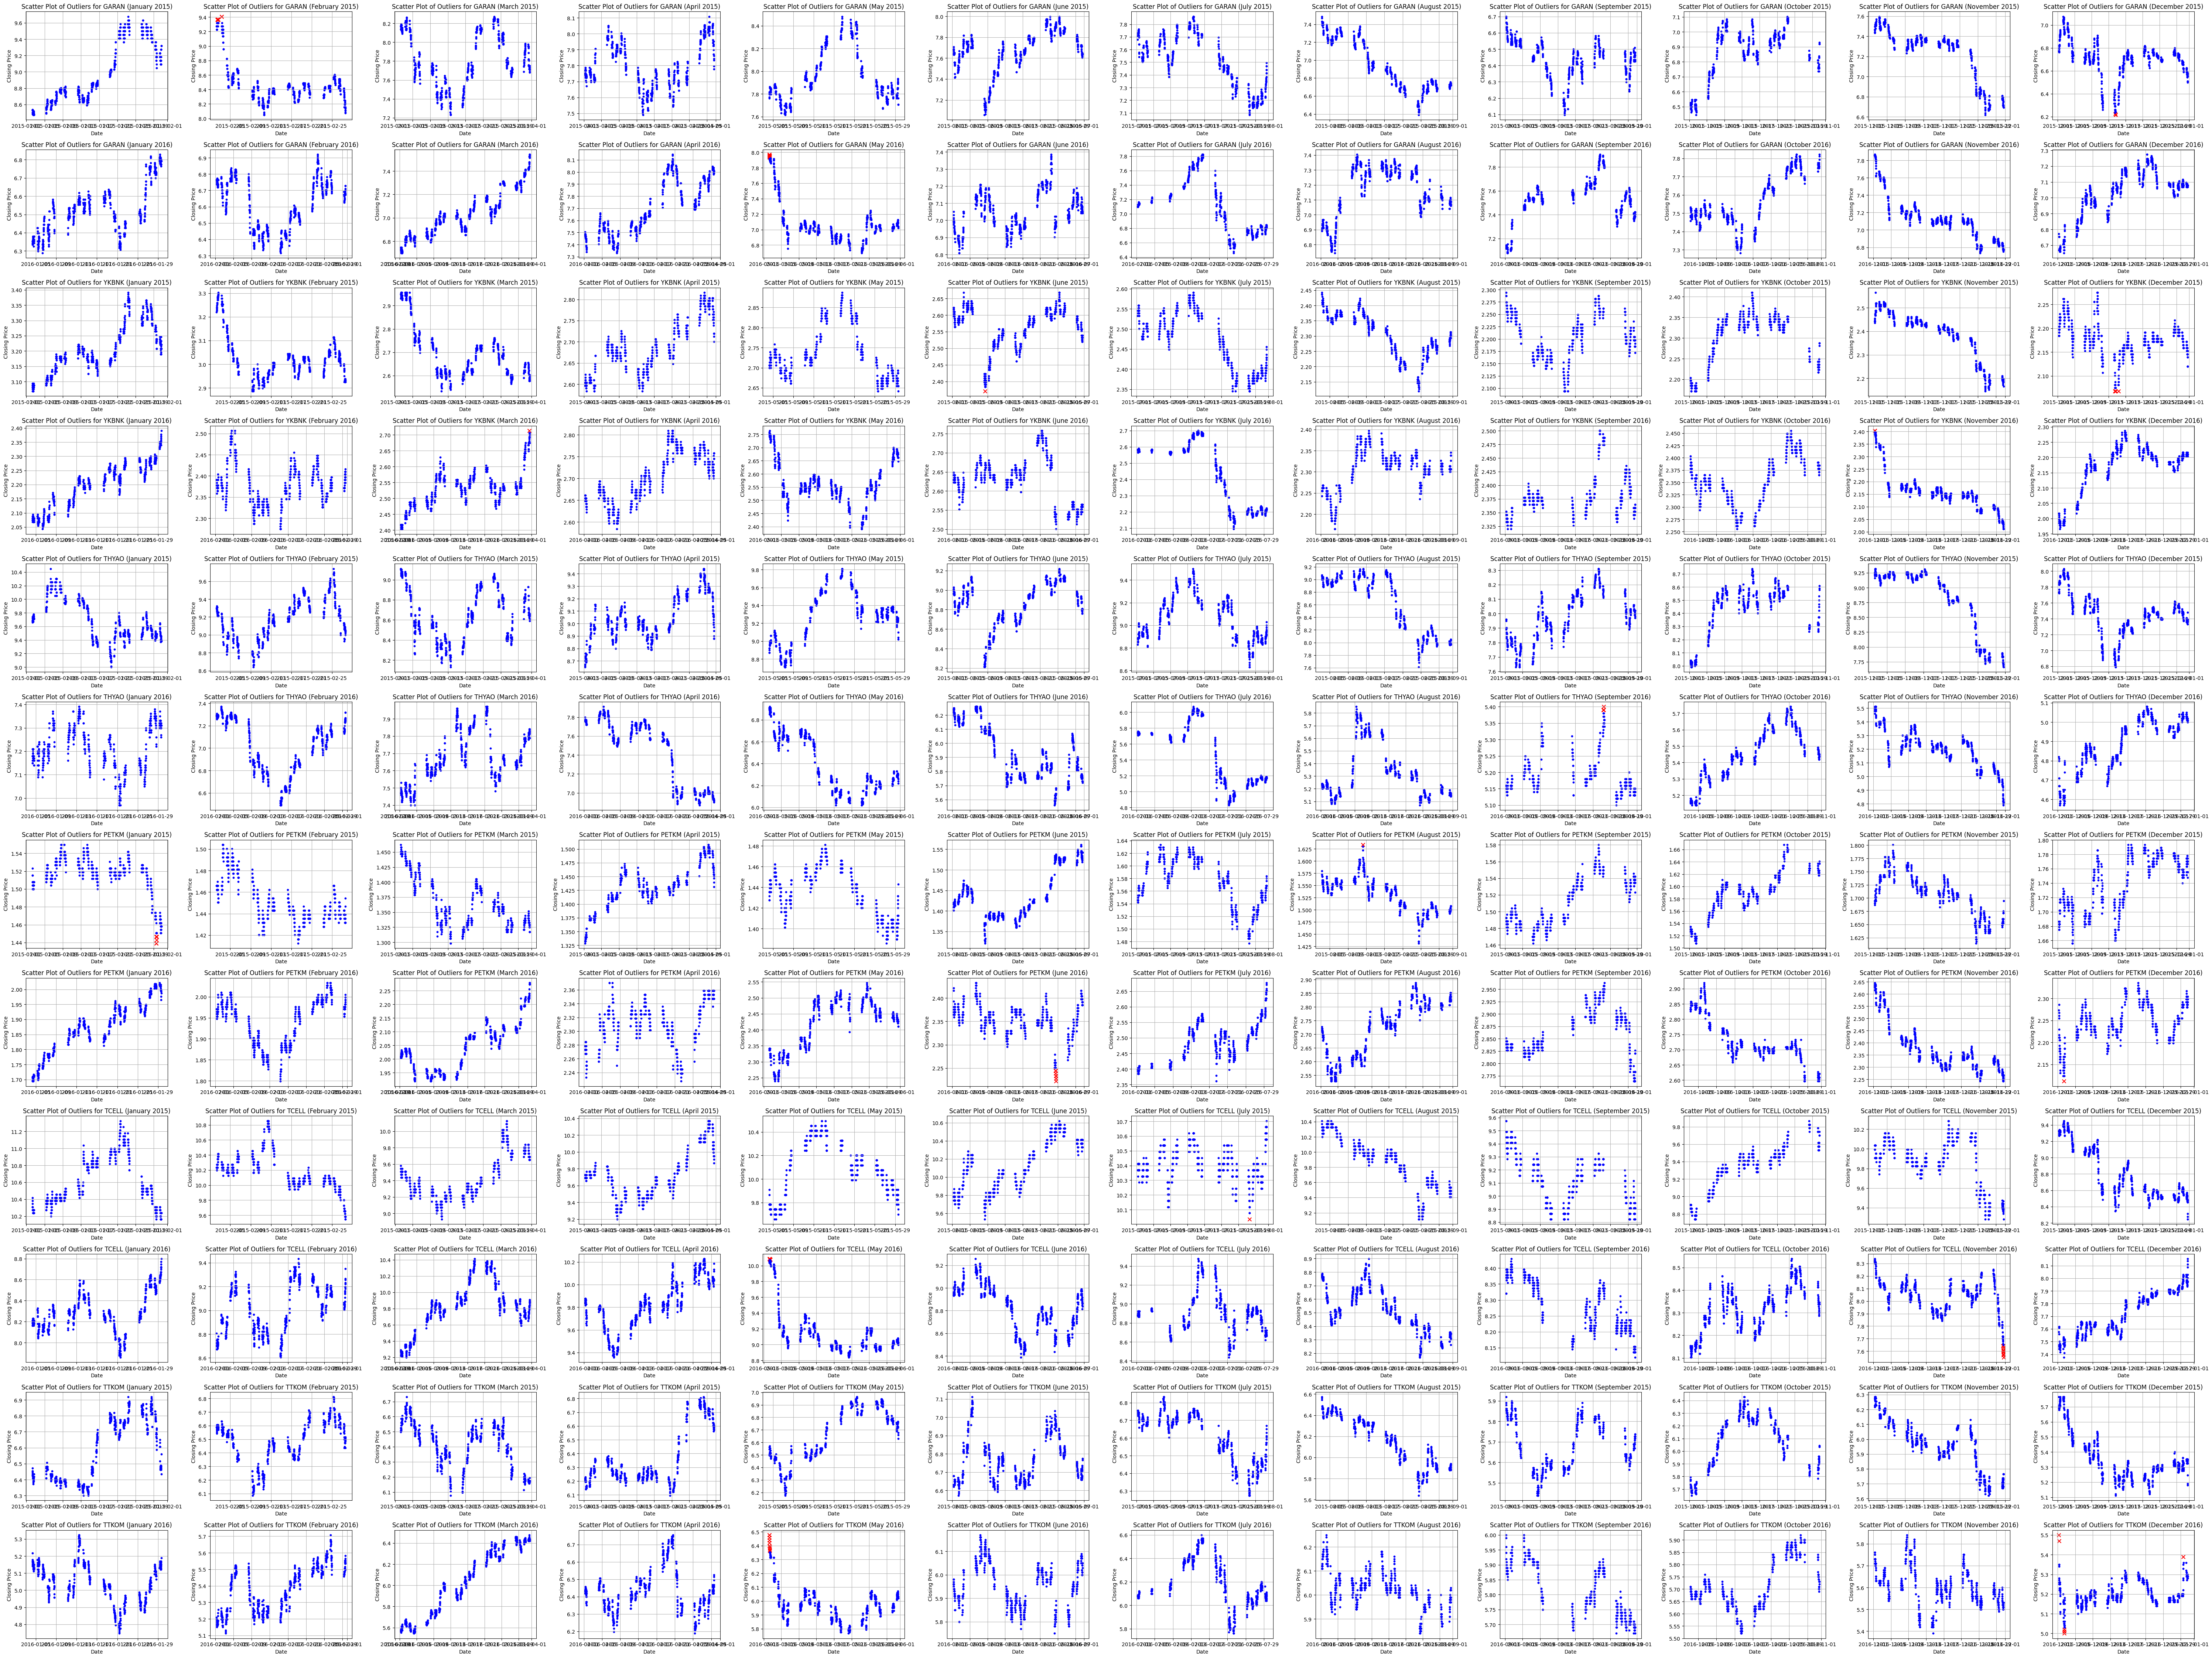

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame called "ts" with the specified format

# Ensure that the DataFrame has a datetime index
ts.index = pd.to_datetime(ts.index)

# Extract the year and month information for each timestamp
ts['Year'] = ts.index.year
ts['Month'] = ts.index.month

# Define the order of months for sorting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by Year and Month
ts.sort_values(['Year', 'Month'], inplace=True)

# Initialize a figure to hold subplots
fig, axes = plt.subplots(nrows=len(ts.columns[:-2]) * 2, ncols=12, figsize=(60, 45))

# Loop through each company
for i, company in enumerate(ts.columns[:-2]):  # Exclude 'Year' and 'Month' columns
    for year in ts['Year'].unique():
        for month_num, month_name in enumerate(months_order):
            ax = axes[i * 2 + (year - ts['Year'].min()), month_num]

            # Filter data for the current company, year, and month
            company_data = ts[(ts['Year'] == year) & (ts['Month'] == (month_num + 1))]
            outliers = find_outliers_sigma(company_data, company)

            # Scatter plot the outliers
            ax.scatter(outliers.index, outliers[company], c='red', label='Outliers', marker='x', s=50)

            # Plot the non-outliers data in blue
            non_outliers = company_data.drop(outliers.index)
            ax.scatter(non_outliers.index, non_outliers[company], c='blue', label='Non-Outliers', marker='o', s=10)

            ax.set_title(f'Scatter Plot of Outliers for {company} ({month_name} {year})')
            ax.set_xlabel('Date')
            ax.set_ylabel('Closing Price')
#            ax.legend(loc='best')
            ax.grid(True)

plt.tight_layout()
plt.subplots_adjust()
plt.show()


## Insights taken from the outliers

* December of 2016- Trump’s reign continues in December. The stock market is still unstable. TTKOM and YKBNK has a lot of outliers in this month. Although not as many as  TTKOM and YKBNK, PETKM and GARAN also have many outliers,


* November of 2016- As Donald Trump got elected in US Election, exchange rate of dollar became unstable in Turkey and the stock prices were affected by this situation. That's one possible reason behind GARAN and YKBNK having a lot of outliers in this month. It is also possible that this situation was the cause of the outliers that can be seen in other companies' box plot.


* July of 2016- Turkey had met with a failed military coup attempt on 15th of July in 2016. All of the stock prices decreased significantly due to this political turbulence. It is also unexpected that there were few outliers observed in July's box plot graph despite the fact that it caused a decline in the Turkish markets.


* May of 2016- The cabinet reshuffle that happened in May projected political instability to the markets. Former prime minister Ahmet Davutoğlu resigned and was replaced by Binali Yıldırım. Many changes in the government officials alongside with the resignation of the prime minister, showed an unstable government structure and therefore caused a general decline in the markets.


* November of 2015- The general elections were held at the start of November of 2015. After the political ambiguity was resolved, stock prices rose in the first days after the election, and then fell gradually in the following days. That might be the reason behind the observed outliers in November.


* December of 2015-  In the 24th of November 2015, a Russian fighter jet was shot down by Turkish Air Forces. After the incident, the political and economic environment became unstable because of the possibility of a military confrontation. Russia imposed several sanctions on Turkey in retaliation, and this caused a downward trend in the economy in December. This situation might be the cause of many outliers observed in this and the following month.


* February of 2015- On February 3, 2015, 63% of Bank Asya was seized by BDDK. Since this action by BDDK is politically motivated, all of the companies’ stock prices fell down dramatically after this event. This may be the reason for the large number of outliers observed in box plot.


## Garanti vs Yapı Kredi

### Time series plots and Outliers dataframe plots

Since both Garanti and Yapı Kredi are banking companies, the distribution of their data is similar on the selected interval. So, outlier analysis are constructed based on this similarity.

<Axes: title={'center': 'Time Series plot for GARAN'}, xlabel='timestamp'>

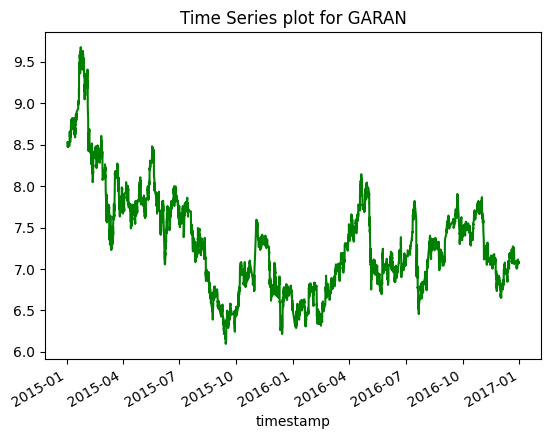

In [ ]:
ts["GARAN"].plot(title="Time Series plot for GARAN", c="g")

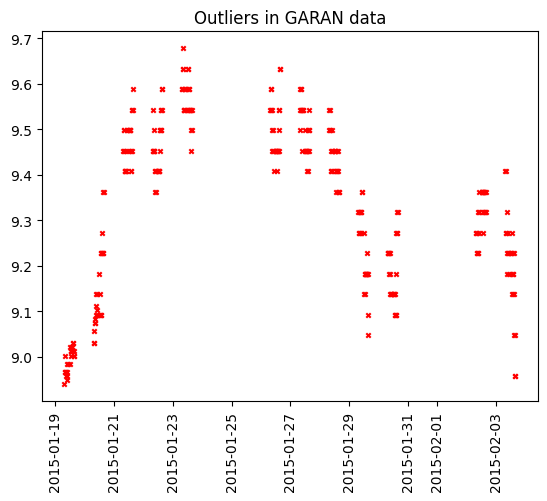

In [ ]:
outliers = find_outliers_iqr(ts, "GARAN")
plt.scatter(outliers.index, outliers["GARAN"], c='red', label='Outliers', marker='x', s=10)
plt.xticks(rotation=90)
plt.title("Outliers in GARAN data")

nout_garan = outliers.shape[0]

<Axes: title={'center': 'Time Series plot for YKBNK'}, xlabel='timestamp'>

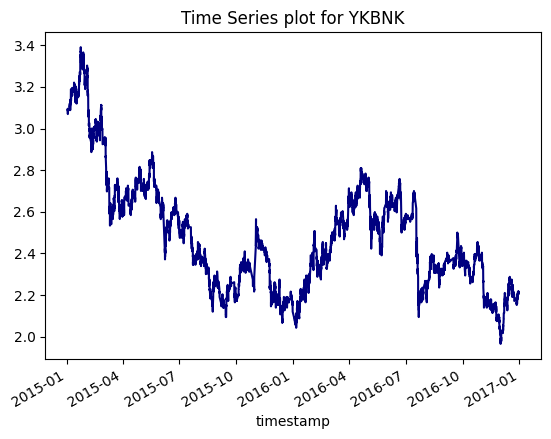

In [ ]:
ts["YKBNK"].plot(title="Time Series plot for YKBNK", c="navy")

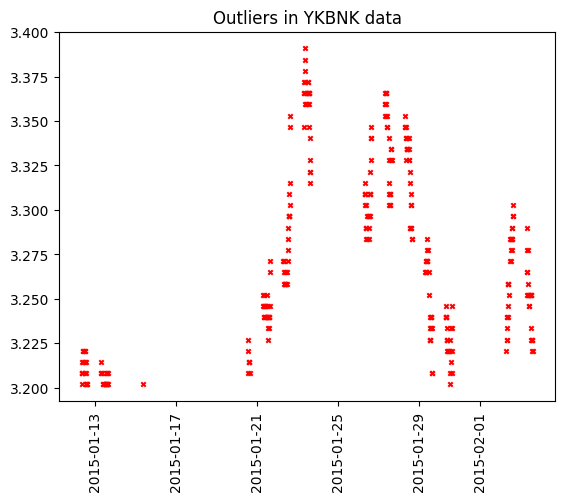

In [ ]:
outliers = find_outliers_iqr(ts, "YKBNK")
plt.scatter(outliers.index, outliers["YKBNK"], c='red', label='Outliers', marker='x', s=10)
plt.xticks(rotation=90)
plt.title("Outliers in YKBNK data")

nout_ykbnk = outliers.shape[0]

In [ ]:
print(f"Number of outliers in GARAN data: {nout_garan}.")
print(f"Number of outliers in YKBNK data: {nout_ykbnk}.")
print("Yapı Kredi has less outliers, more robust patterns.")

Number of outliers in GARAN data: 324.
Number of outliers in YKBNK data: 309.
Yapı Kredi has less outliers, more robust patterns.


## Characteristics of the data with log return
* The analysis below conducted after receiving feedbacks from Mustafa Hoca at the last day of the submission.
We have a couple hours to analyze this part before deadline, so we do not have enough time to take insights about this section.

Codes below are generated by ChatGPT.

ChatGPT Prompt: I believe you understand my objective and characteristics of my time series. I need you to write a code to construct a new df based on resample data daily and log[(Y_t+1)/Y_t] (log return).

In [ ]:
# Calculate the daily log returns
daily_returns = ts.pct_change().apply(lambda x: (1 + x).apply(pd.np.log))

# Drop the first row (NaN value) as there is no previous day's data
daily_returns = daily_returns.dropna()

# You can rename the columns to indicate that these are log returns
daily_returns.columns = [f'{col}_Log_Return' for col in daily_returns.columns]

# If you want to resample the data daily, you can do it like this:
daily_returns_resampled = daily_returns.resample('D').mean()  # Resample to daily frequency, taking the mean for each day

# If you want to keep only the daily log returns and remove weekends (non-trading days), you can do this:
daily_returns_resampled = daily_returns_resampled[daily_returns_resampled.index.dayofweek < 5]


<ipython-input-22-9dbbcb130908>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  daily_returns = ts.pct_change().apply(lambda x: (1 + x).apply(pd.np.log))


In [ ]:
daily_returns_resampled.isna().sum()

GARAN_Log_Return    19
YKBNK_Log_Return    19
THYAO_Log_Return    19
PETKM_Log_Return    19
TCELL_Log_Return    19
TTKOM_Log_Return    19
Year_Log_Return     19
Month_Log_Return    19
dtype: int64

<Axes: xlabel='timestamp'>

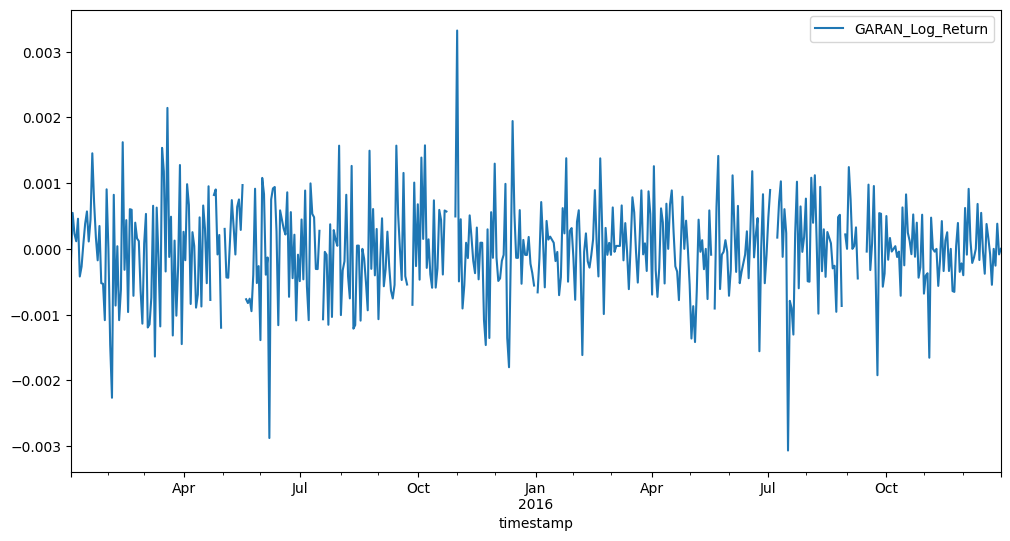

In [ ]:
daily_returns_resampled[["GARAN_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

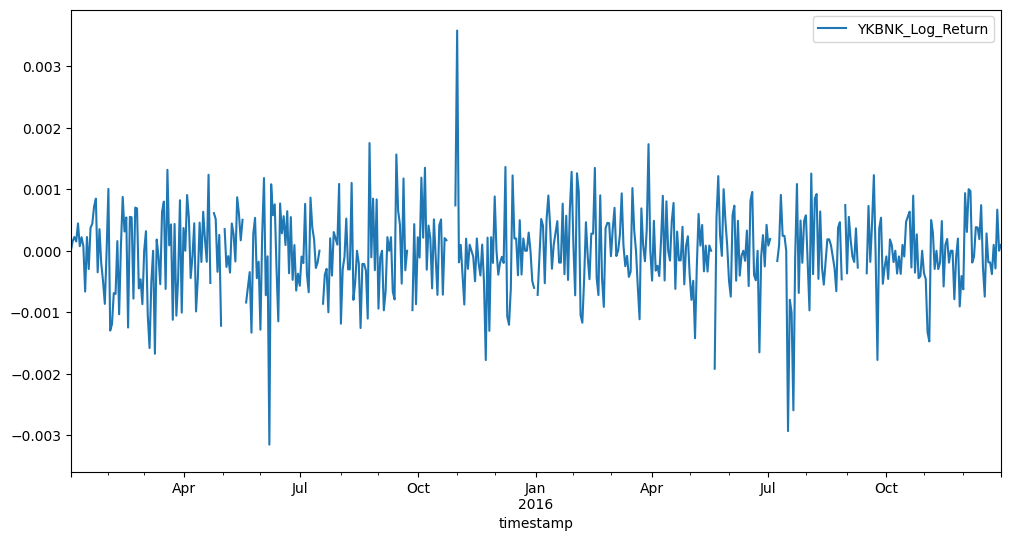

In [ ]:
daily_returns_resampled[["YKBNK_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

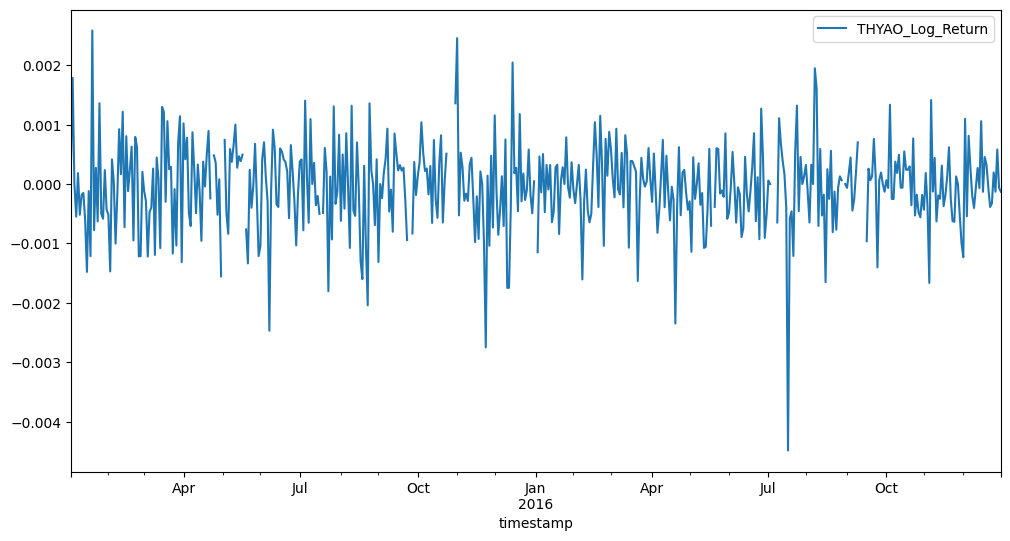

In [ ]:
daily_returns_resampled[["THYAO_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

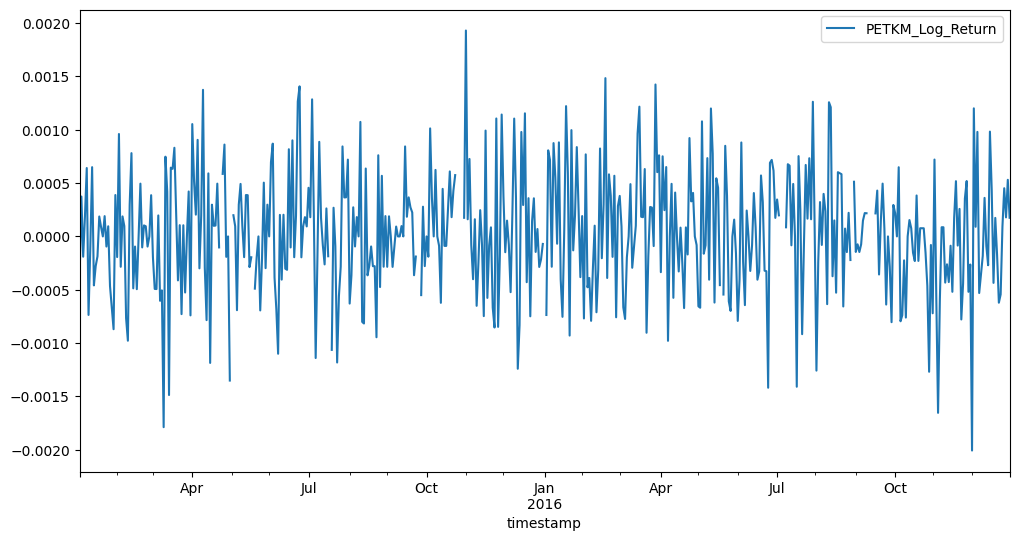

In [ ]:
daily_returns_resampled[["PETKM_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

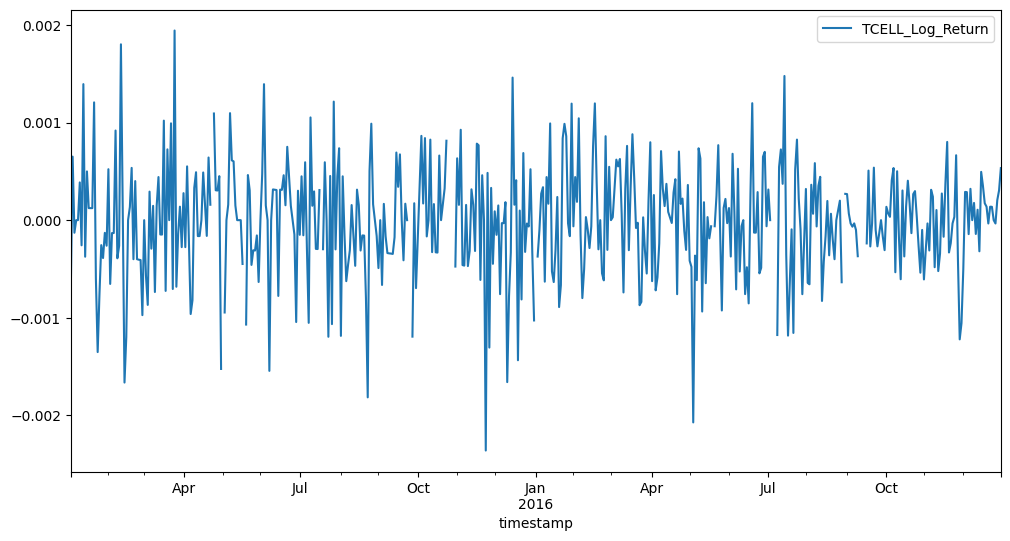

In [ ]:
daily_returns_resampled[["TCELL_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

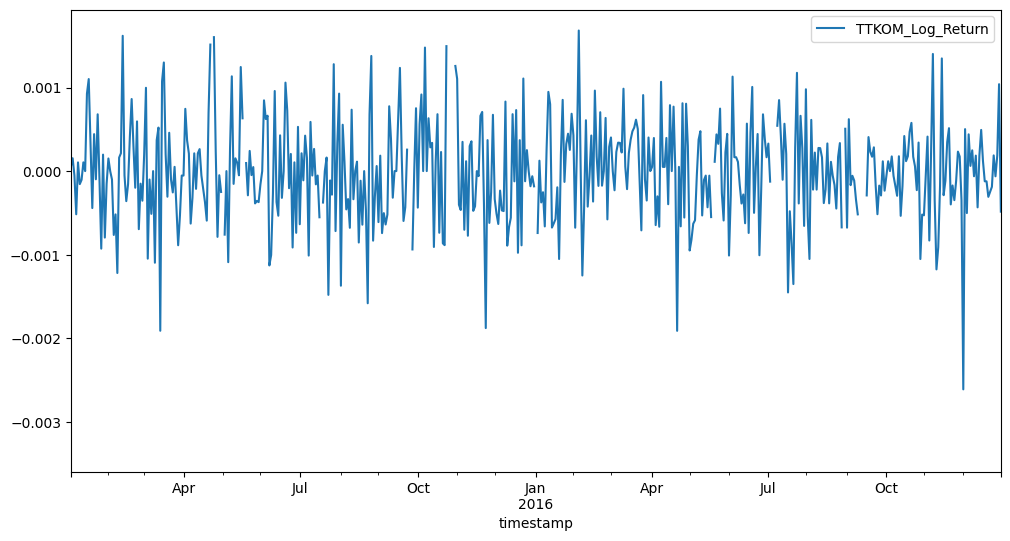

In [ ]:
daily_returns_resampled[["TTKOM_Log_Return"]].plot(figsize=(12,6))

<Axes: xlabel='timestamp'>

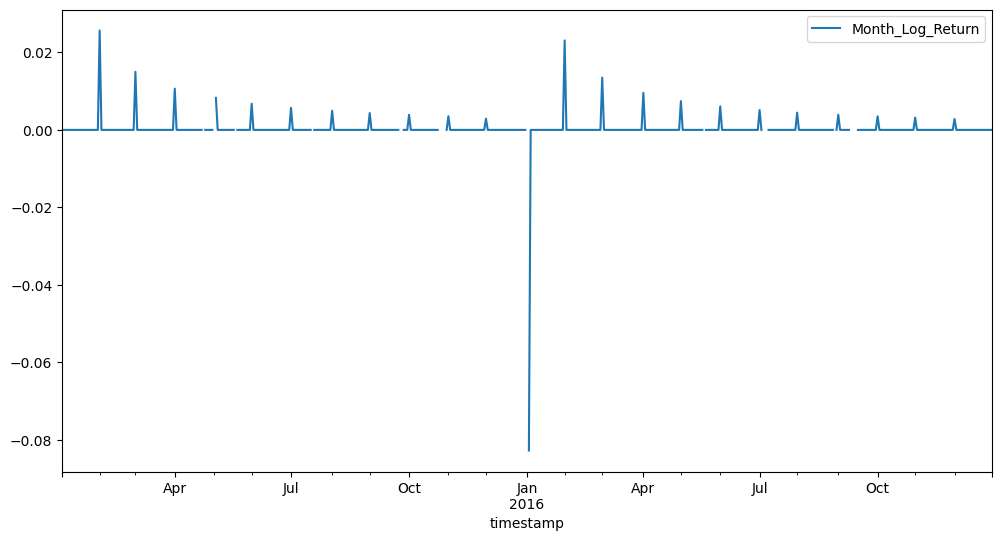

In [ ]:
daily_returns_resampled[["Month_Log_Return"]].plot(figsize=(12,6))

Number of outliers in 'GARAN_Log_Return': 9
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-02-04 00:00:00+00:00         -0.002264         -0.001193   
2015-03-19 00:00:00+00:00          0.002143          0.001315   
2015-06-08 00:00:00+00:00         -0.002876         -0.003149   
2015-10-28 00:00:00+00:00         -0.002832         -0.003244   
2015-11-02 00:00:00+00:00          0.003320          0.003576   
2015-12-11 00:00:00+00:00         -0.001800         -0.001202   
2015-12-15 00:00:00+00:00          0.001943          0.001223   
2016-07-18 00:00:00+00:00         -0.003066         -0.002929   
2016-09-26 00:00:00+00:00         -0.001921         -0.001774   

                           THYAO_Log_Return  PETKM_Log_Return  \
timestamp                                                       
2015-02-04 00:00:00+00:00          0.000414         -0.000285   
2015-03-19 00:00:00+00:00          0.001058  

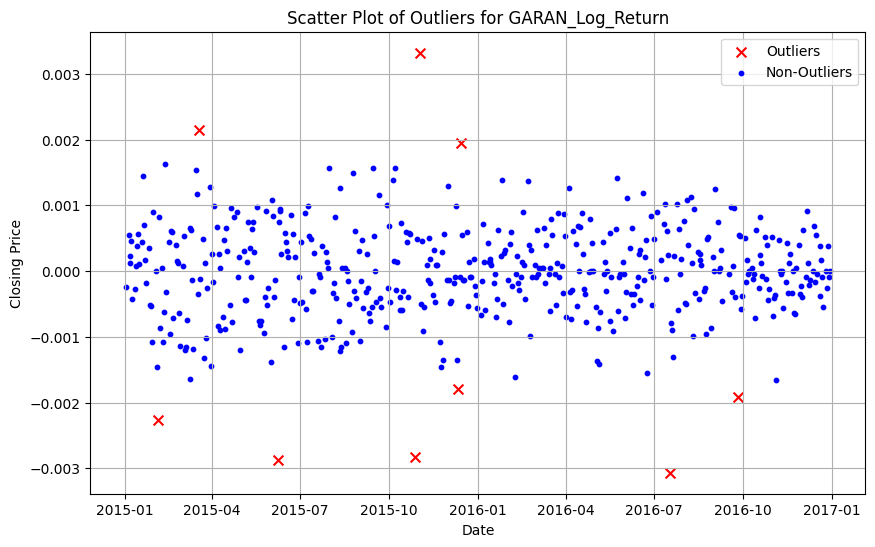

Number of outliers in 'YKBNK_Log_Return': 12
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-03-10 00:00:00+00:00         -0.001638         -0.001673   
2015-06-08 00:00:00+00:00         -0.002876         -0.003149   
2015-08-25 00:00:00+00:00          0.001493          0.001748   
2015-10-28 00:00:00+00:00         -0.002832         -0.003244   
2015-11-02 00:00:00+00:00          0.003320          0.003576   
2015-11-24 00:00:00+00:00         -0.001463         -0.001776   
2016-03-30 00:00:00+00:00          0.000875          0.001731   
2016-05-20 00:00:00+00:00         -0.000907         -0.001916   
2016-06-24 00:00:00+00:00         -0.001557         -0.001650   
2016-07-18 00:00:00+00:00         -0.003066         -0.002929   
2016-07-21 00:00:00+00:00         -0.001303         -0.002592   
2016-09-26 00:00:00+00:00         -0.001921         -0.001774   

                           THYAO_Log_Return 

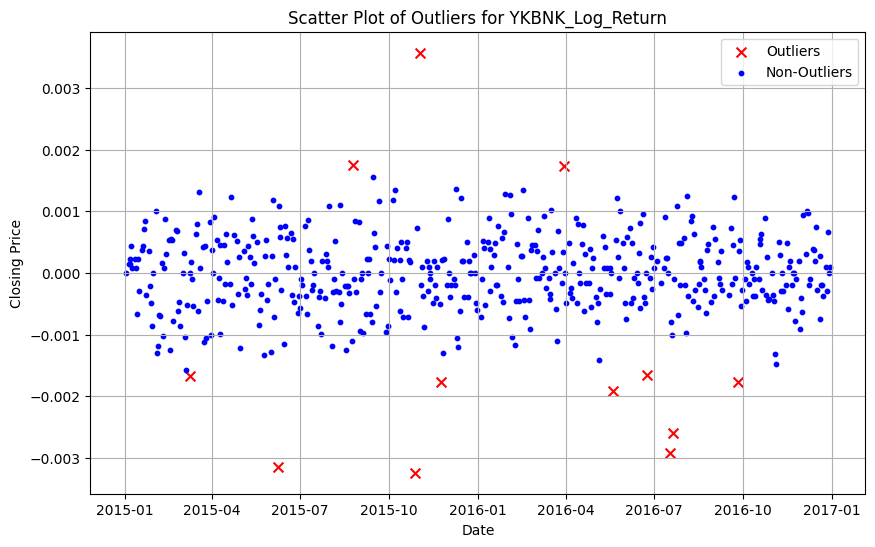

Number of outliers in 'THYAO_Log_Return': 14
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-01-05 00:00:00+00:00          0.000547          0.000152   
2015-01-20 00:00:00+00:00          0.001453          0.000440   
2015-06-08 00:00:00+00:00         -0.002876         -0.003149   
2015-07-23 00:00:00+00:00         -0.001154         -0.000999   
2015-08-24 00:00:00+00:00         -0.000934         -0.001102   
2015-10-28 00:00:00+00:00         -0.002832         -0.003244   
2015-11-02 00:00:00+00:00          0.003320          0.003576   
2015-11-24 00:00:00+00:00         -0.001463         -0.001776   
2015-12-10 00:00:00+00:00         -0.001355         -0.001063   
2015-12-11 00:00:00+00:00         -0.001800         -0.001202   
2015-12-15 00:00:00+00:00          0.001943          0.001223   
2016-04-20 00:00:00+00:00         -0.000266         -0.000620   
2016-07-18 00:00:00+00:00         -0.003066  

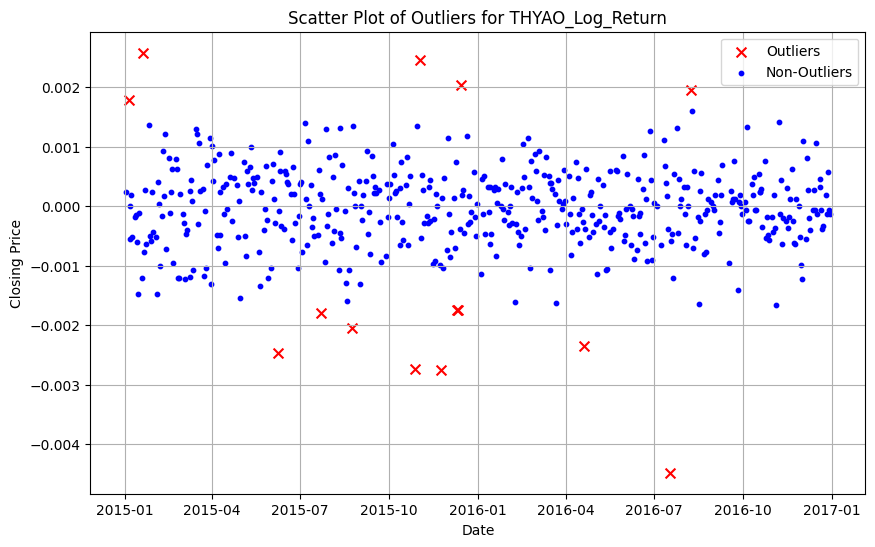

Number of outliers in 'PETKM_Log_Return': 12
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-03-10 00:00:00+00:00         -0.001638         -0.001673   
2015-03-13 00:00:00+00:00         -0.001179         -0.000543   
2015-04-30 00:00:00+00:00         -0.001199         -0.001217   
2015-06-24 00:00:00+00:00          0.000559          0.000546   
2015-10-28 00:00:00+00:00         -0.002832         -0.003244   
2015-11-02 00:00:00+00:00          0.003320          0.003576   
2016-02-18 00:00:00+00:00          0.000093         -0.000442   
2016-03-29 00:00:00+00:00         -0.000336          0.000340   
2016-06-24 00:00:00+00:00         -0.001557         -0.001650   
2016-07-18 00:00:00+00:00         -0.003066         -0.002929   
2016-11-04 00:00:00+00:00         -0.001655         -0.001472   
2016-12-01 00:00:00+00:00         -0.000401         -0.000627   

                           THYAO_Log_Return 

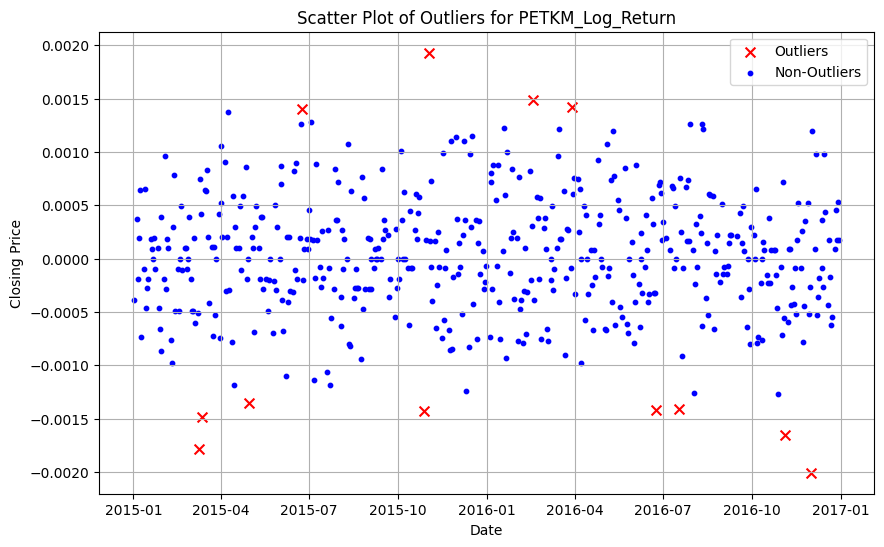

Number of outliers in 'TCELL_Log_Return': 16
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-01-13 00:00:00+00:00          0.000077          0.000073   
2015-01-23 00:00:00+00:00         -0.000174         -0.000350   
2015-02-11 00:00:00+00:00         -0.000617          0.000079   
2015-02-13 00:00:00+00:00         -0.000319          0.000312   
2015-03-25 00:00:00+00:00          0.000126          0.000435   
2015-04-30 00:00:00+00:00         -0.001199         -0.001217   
2015-06-03 00:00:00+00:00          0.000832          0.001181   
2015-06-08 00:00:00+00:00         -0.002876         -0.003149   
2015-08-24 00:00:00+00:00         -0.000934         -0.001102   
2015-11-24 00:00:00+00:00         -0.001463         -0.001776   
2015-11-26 00:00:00+00:00         -0.001356         -0.001301   
2015-12-10 00:00:00+00:00         -0.001355         -0.001063   
2015-12-15 00:00:00+00:00          0.001943  

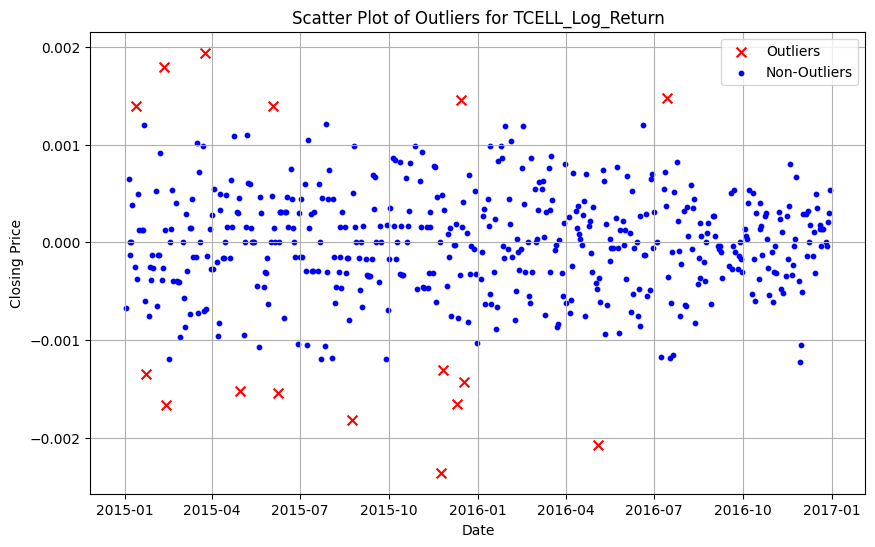

Number of outliers in 'TTKOM_Log_Return': 12
                           GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-02-12 00:00:00+00:00          0.001622          0.000874   
2015-03-13 00:00:00+00:00         -0.001179         -0.000543   
2015-04-22 00:00:00+00:00         -0.000777         -0.000523   
2015-04-24 00:00:00+00:00          0.000819          0.000611   
2015-08-24 00:00:00+00:00         -0.000934         -0.001102   
2015-10-07 00:00:00+00:00          0.001574          0.001347   
2015-10-23 00:00:00+00:00          0.000568          0.000171   
2015-10-28 00:00:00+00:00         -0.002832         -0.003244   
2015-11-24 00:00:00+00:00         -0.001463         -0.001776   
2016-02-04 00:00:00+00:00          0.000587          0.000956   
2016-04-21 00:00:00+00:00         -0.000345          0.000312   
2016-12-01 00:00:00+00:00         -0.000401         -0.000627   

                           THYAO_Log_Return 

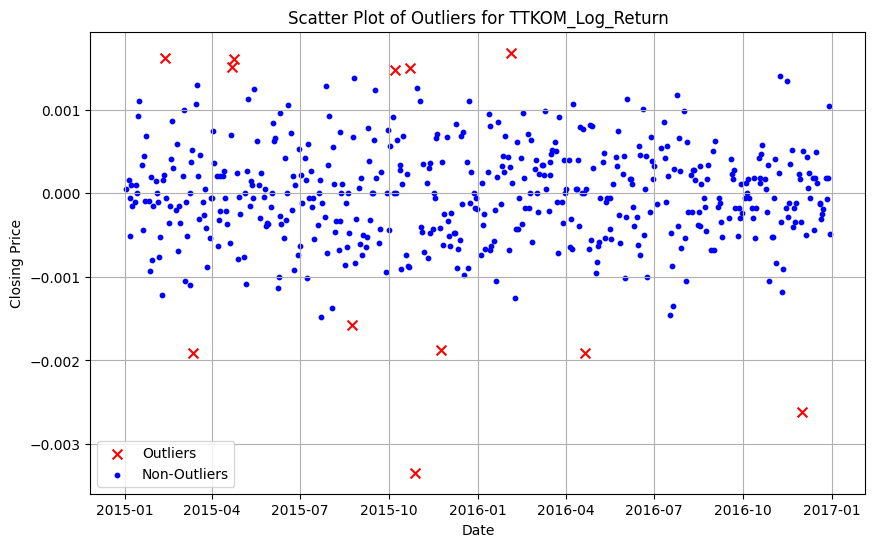

In [ ]:
# Finding and visualizing the outliers for each column
columns_to_check = ["GARAN_Log_Return", "YKBNK_Log_Return", "THYAO_Log_Return", "PETKM_Log_Return", "TCELL_Log_Return", "TTKOM_Log_Return"]

# Finding the outliers for each column
for column in columns_to_check:
    outliers_resampled = find_outliers_iqr(daily_returns_resampled, column)
    print(f"Number of outliers in '{column}': {outliers_resampled.shape[0]}")
    print(outliers_resampled)

    # Scatter plot the outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(outliers_resampled.index, outliers_resampled[column], c='red', label='Outliers', marker='x', s=50)

    # Plot the non-outlier data in blue
    non_outliers = daily_returns_resampled.drop(outliers_resampled.index)
    plt.scatter(non_outliers.index, non_outliers[column], c='blue', label='Non-Outliers', marker='o', s=10)

    plt.title(f'Scatter Plot of Outliers for {column}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

## Correlation Matrix and Volatility

ChatGPT Prompt: Write a python code to show the correlation matrix and volatility. Explain them in detail. Give general informations about them.

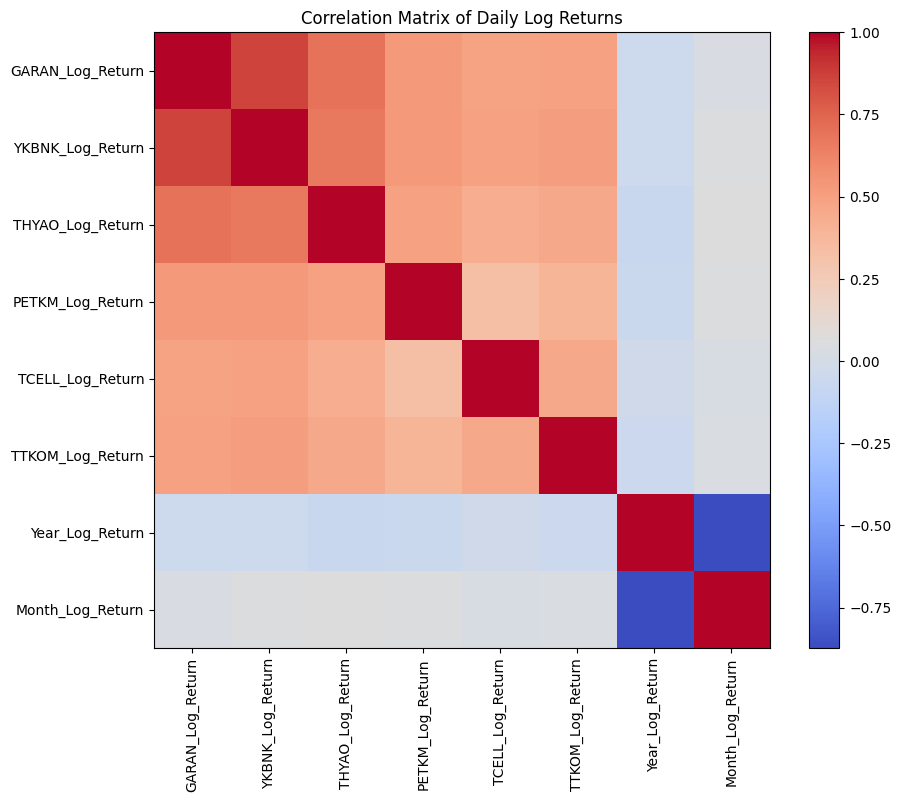

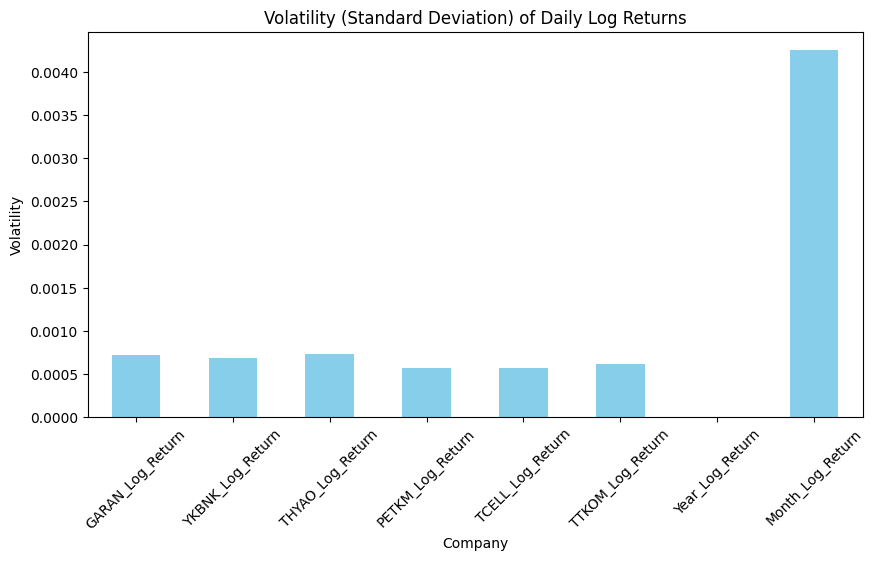

In [ ]:
# Calculate the correlation matrix
correlation_matrix = daily_returns_resampled.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Daily Log Returns')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Calculate and plot volatility (standard deviation) for each company
volatility = daily_returns_resampled.std()
plt.figure(figsize=(10, 5))
volatility.plot(kind='bar', color='skyblue')
plt.title('Volatility (Standard Deviation) of Daily Log Returns')
plt.xlabel('Company')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis:
* Positive Correlation: When two stocks have a positive correlation, it suggests that they tend to move in the same direction. An increase in one stock's log return is associated with an increase in the other's, and vice versa. This can be useful for diversification decisions. If two stocks are highly positively correlated, adding both to a portfolio may not provide as much diversification benefit.
* Negative Correlation: Negative correlation indicates that two stocks tend to move in opposite directions. When one stock's log return increases, the other's tends to decrease. Negative correlations can be beneficial for risk management. Combining negatively correlated assets in a portfolio may help reduce overall portfolio risk.
* Low Correlation: Stocks with low or near-zero correlation may provide better diversification opportunities. Low correlation means that the stocks' price movements are relatively independent of each other. A portfolio of low-correlation assets can reduce the overall portfolio risk.
* Correlation Changes: Be aware that correlations between stocks can change over time. Market conditions, economic events, or changes in company-specific factors can influence correlations. Regularly monitoring correlations is essential for risk management.


Volatility Analysis:
* High Volatility: Stocks with high volatility in their daily log returns are considered riskier investments. Investors may expect larger price swings, both up and down. High-volatility stocks can offer potential for high returns but also come with increased risk.
* Low Volatility: Stocks with low volatility are considered more stable. They tend to have smaller price fluctuations. Low-volatility stocks are often favored by conservative investors looking for stability and income.
* Comparative Volatility: Volatility analysis allows you to compare the risk levels of different stocks. You can assess whether a stock is more or less volatile than its peers or benchmark indices. This information is crucial for portfolio construction and risk management.
* Changing Volatility: Volatility is not constant, and it can change over time. Identifying changes in a stock's volatility can help you anticipate potential shifts in its risk profile. For example, high volatility may precede significant news or earnings announcements.
* Volatility Clusters: Volatility can exhibit clustering behavior. Periods of high volatility may be followed by continued high volatility, and vice versa. Recognizing these clusters can be valuable for timing investment decisions.


In [ ]:
d_ts = daily_returns_resampled.drop(["Month_Log_Return", "Year_Log_Return"], axis=1)
d_ts.head()

GARAN_Log_Return  YKBNK_Log_Return  \
timestamp                                                       
2015-01-02 00:00:00+00:00         -0.000244      5.771292e-18   
2015-01-05 00:00:00+00:00          0.000547      1.519949e-04   
2015-01-06 00:00:00+00:00          0.000232      2.238614e-04   
2015-01-07 00:00:00+00:00          0.000116      1.504634e-04   
2015-01-08 00:00:00+00:00          0.000458      4.430841e-04   

                           THYAO_Log_Return  PETKM_Log_Return  \
timestamp                                                       
2015-01-02 00:00:00+00:00      2.381527e-04         -0.000388   
2015-01-05 00:00:00+00:00      1.785263e-03          0.000374   
2015-01-06 00:00:00+00:00     -2.145917e-17         -0.000190   
2015-01-07 00:00:00+00:00     -5.487069e-04          0.000190   
2015-01-08 00:00:00+00:00      1.838070e-04          0.000641   

                           TCELL_Log_Return  TTKOM_Log_Return  
timestamp                                                      
2015-01-02 00:00:00+00:00     -6.756372e-04          0.000053  
2015-01-05 00:00:00+00:00      6.506136e-04          0.000154  
2015-01-06 00:00:00+00:00     -1.289262e-04         -0.000051  
2015-01-07 00:00:00+00:00     -1.037622e-17         -0.000517  
2015-01-08 00:00:00+00:00     -7.597446e-18          0.000104

ChatGPT Prompt: how to fill nan values by the mean of the previous 2 and next 2 data points?

In [ ]:
# Define the number of previous and next data points to consider
n = 2

# Fill NaN values with the mean of the surrounding data points
d_ts = d_ts.fillna(d_ts.rolling(window=2 * n + 1, min_periods=1).mean())

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Create a DataFrame to store ADF test results
adf_results = pd.DataFrame(columns=['ADF Statistic', 'p-value', 'Lags Used', 'Number of Observations', 'Critical Values'])

# Loop through each column
for column in d_ts.columns:
    result = adfuller(d_ts[column], autolag='AIC')
    adf_results.loc[column] = [result[0], result[1], result[2], result[3], result[4]]

# Print ADF test results
print("ADF Test Results:")
print(adf_results)

# Interpret the results
for column in adf_results.index:
    adf_statistic = adf_results.loc[column]['ADF Statistic']
    p_value = adf_results.loc[column]['p-value']
    critical_values = adf_results.loc[column]['Critical Values']

    print(f"\nColumn: {column}")
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {p_value}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"  {key}: {value}")

    if p_value <= alpha:
        print(f"Conclusion: Reject the null hypothesis (stationary)")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis (non-stationary)")


ADF Test Results:
                  ADF Statistic       p-value  Lags Used  \
GARAN_Log_Return     -17.500708  4.387011e-30          1   
YKBNK_Log_Return     -16.991184  8.866652e-30          1   
THYAO_Log_Return     -17.416868  4.850605e-30          1   
PETKM_Log_Return     -17.479997  4.494702e-30          1   
TCELL_Log_Return     -22.327185  0.000000e+00          0   
TTKOM_Log_Return     -17.535836  4.213791e-30          1   

                  Number of Observations  \
GARAN_Log_Return                     519   
YKBNK_Log_Return                     519   
THYAO_Log_Return                     519   
PETKM_Log_Return                     519   
TCELL_Log_Return                     520   
TTKOM_Log_Return                     519   

                                                    Critical Values  
GARAN_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
YKBNK_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
THYAO_Log_Return  {'1%': -3.44301269337467

In [ ]:
adf_results

ADF Statistic       p-value  Lags Used  \
GARAN_Log_Return     -17.500708  4.387011e-30          1   
YKBNK_Log_Return     -16.991184  8.866652e-30          1   
THYAO_Log_Return     -17.416868  4.850605e-30          1   
PETKM_Log_Return     -17.479997  4.494702e-30          1   
TCELL_Log_Return     -22.327185  0.000000e+00          0   
TTKOM_Log_Return     -17.535836  4.213791e-30          1   

                  Number of Observations  \
GARAN_Log_Return                     519   
YKBNK_Log_Return                     519   
THYAO_Log_Return                     519   
PETKM_Log_Return                     519   
TCELL_Log_Return                     520   
TTKOM_Log_Return                     519   

                                                    Critical Values  
GARAN_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
YKBNK_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
THYAO_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
PETKM_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...  
TCELL_Log_Return  {'1%': -3.4429882202506255, '5%': -2.867114212...  
TTKOM_Log_Return  {'1%': -3.4430126933746767, '5%': -2.867124983...

### Value at Risk Calculations

ChatGPT Prompt: Write a code for Value at Risk calculations and explain in detail what is VaR? Give general informations about VaR.

In [ ]:
from scipy.stats import norm

# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'GARAN_Log_Return' column as a NumPy array
returns = d_ts['GARAN_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0014


In [ ]:
# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'YKBNK_Log_Return' column as a NumPy array
returns = d_ts['YKBNK_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0014


In [ ]:
# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'THYAO_Log_Return' column as a NumPy array
returns = d_ts['THYAO_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0015


In [ ]:
# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'PETKM_Log_Return' column as a NumPy array
returns = d_ts['PETKM_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0011


In [ ]:
# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'TCELL_Log_Return' column as a NumPy array
returns = d_ts['TCELL_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0011


In [ ]:
# Define the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Define the time horizon (e.g., 1 day)
time_horizon = 1

# Extract the 'TTKOM_Log_Return' column as a NumPy array
returns = d_ts['TTKOM_Log_Return'].values

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the Z-score for the given confidence level
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the VaR using the parametric method (normal distribution)
var_parametric = -mean_return * time_horizon + z_score * std_dev * np.sqrt(time_horizon)

# Print the VaR
print(f"Parametric VaR at {confidence_level * 100}% confidence for {time_horizon} day(s): {var_parametric:.4f}")


Parametric VaR at 95.0% confidence for 1 day(s): 0.0012


* Lower VaR (Desirable):
    * For most investors, a lower VaR is typically considered better because it implies that the potential losses are limited and the portfolio or investment is less risky.
    * Lower VaR indicates a higher level of confidence that the potential losses will not exceed a certain threshold over a specific time horizon.
    * Conservative or risk-averse investors may prefer portfolios or strategies with lower VaR because they prioritize capital preservation and lower volatility.
* Higher VaR (Acceptable or Required):
    * In some cases, a higher VaR might be acceptable or even required, depending on the investment goals and risk appetite.
    * Risk-tolerant investors or institutions with a longer investment horizon may be willing to accept a higher VaR in exchange for the potential for higher returns.
    * Certain investment strategies, such as those targeting higher-risk, higher-reward assets, may naturally have a higher VaR.
It's crucial to consider the following factors when interpreting VaR:
* Risk Tolerance: Investors should align the chosen VaR level with their risk tolerance and investment objectives. A higher VaR may be appropriate for those willing to accept higher short-term volatility for the potential of greater long-term returns.
* Diversification: Portfolio diversification can reduce overall portfolio VaR. Therefore, a well-diversified portfolio may have a lower VaR compared to a concentrated portfolio.
* Time Horizon: VaR can vary depending on the time horizon. Shorter time horizons typically result in lower VaR figures, while longer time horizons can lead to higher VaR due to the potential for larger price fluctuations.
* Regulatory Requirements: Financial institutions and investment funds may have regulatory requirements that dictate acceptable levels of VaR, especially for risk management and capital allocation purposes.
* Scenario Analysis: Consider conducting scenario analysis alongside VaR to understand how the portfolio performs under different market conditions and to capture tail risk that VaR may not fully represent.

## REFERENCES

Complex codes are taken from ChatGPT (GPT-3.5 turbo). Since one of our group members (Burak) works as a Data Scientist, some of the codes are taken from the previous studies/projects. We don't want to use ChatGPT for all of the work, documentations of the libraries helped a lot.

https://chat.openai.com/?model=text-davinci-002-render-sha
https://pandas.pydata.org/docs/
https://matplotlib.org/stable/index.html
https://www.statsmodels.org/stable/index.html
https://www.yapikredi.com.tr/yapi-kredi-hakkinda/piyasa-bulteni/
https://www.garantibbvayatirim.com.tr/arastirma-raporlari/g%C3%BCnl%C3%BCk-b%C3%BCltenler